In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'

In [21]:
img_width = 180
img_height = 180

In [49]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)
    

Found 3115 files belonging to 36 classes.


In [35]:
data_cat = data_train.class_names

In [37]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    shuffle= False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [39]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
    shuffle= False,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


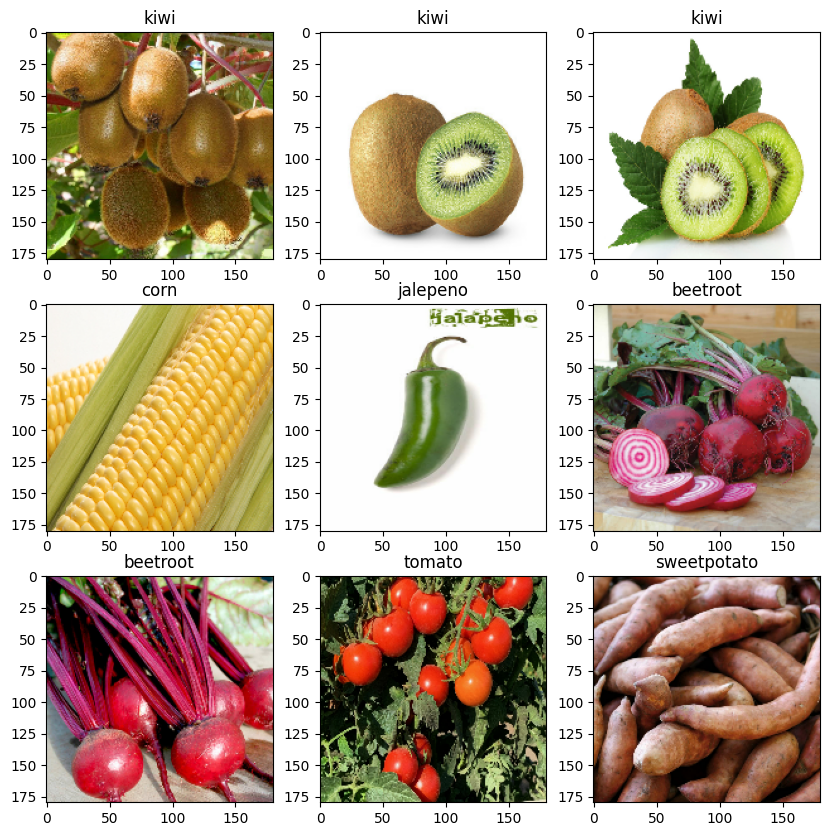

In [51]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])

In [55]:
from tensorflow.keras.models import Sequential

In [57]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat)),
])

In [71]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [73]:
epochs_size = 25
history = model.fit(data_train,validation_data= data_val, epochs =epochs_size,batch_size=32,verbose=1)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 884ms/step - accuracy: 0.0904 - loss: 3.5714 - val_accuracy: 0.3162 - val_loss: 2.4383
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 717ms/step - accuracy: 0.3099 - loss: 2.4186 - val_accuracy: 0.5470 - val_loss: 1.6088
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 683ms/step - accuracy: 0.4544 - loss: 1.8884 - val_accuracy: 0.7635 - val_loss: 0.9315
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 647ms/step - accuracy: 0.6123 - loss: 1.3048 - val_accuracy: 0.8974 - val_loss: 0.5957
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 732ms/step - accuracy: 0.7612 - loss: 0.8046 - val_accuracy: 0.9031 - val_loss: 0.5230
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 622ms/step - accuracy: 0.8517 - loss: 0.5096 - val_accuracy: 0.9316 - val_loss: 0.4133
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 655ms/step - accuracy: 0.9101 - loss: 0.3266 - val_accuracy: 0.9288 - val_loss: 0.4478
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 625ms/step - accuracy: 0.9569 - loss: 0.2089 - val_accu

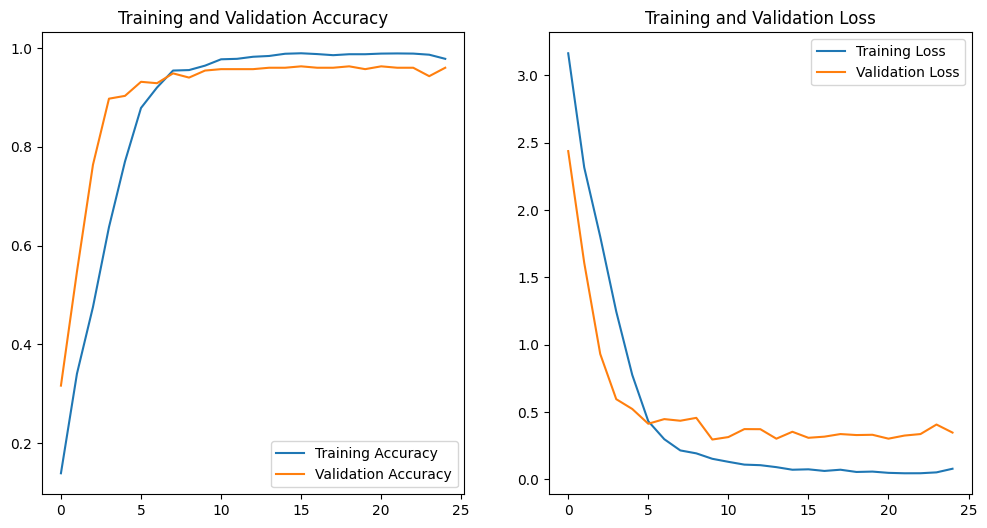

In [91]:
epochs_range = range(epochs_size)
plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st subplot)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd subplot)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.show()


In [113]:
image = 'Fruits_Vegetables/banana.jpeg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [115]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


In [117]:
score = tf.nn.softmax(predict)

In [119]:
print('Veg/Fruit in the image is {} with an accuracy of {:0.2f}%'.format(data_cat[np.argmax(score)], float(np.max(score)) * 100))


Veg/Fruit in the image is lemon with an accuracy of 67.70%


In [123]:
model.save('Image_classify.keras')